In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
#Loading the Data to Pandas DataFrame

redwine_data = pd.read_csv('D:/Data Trained/Internship/Projects/Project Details/01_Red-Wine Project/winequality-red.csv')
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Rows and Columns details of the data

redwine_data.shape

(1599, 12)

In [5]:
#checking if any missing values/null values in the data

redwine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#checking if any duplicate values in the data

redwine_data.duplicated().sum()

240

In [7]:
#checking no. of unique values in all the attributes

redwine_data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
#Statistical details of the red wine data

redwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#general information of the data set

redwine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


C:\Users\praje\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


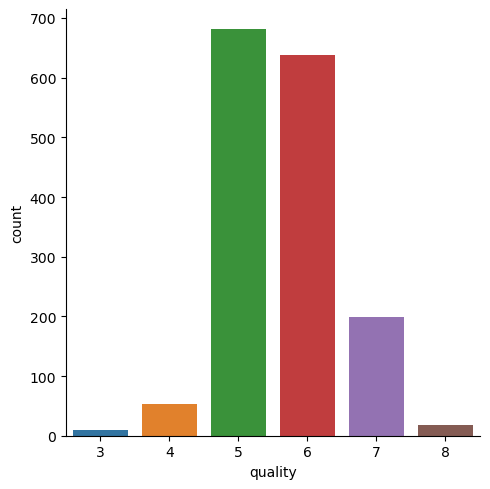

In [10]:
#no. of total data distribution amongst each unique quality

sns.catplot(data=redwine_data, x = 'quality', kind = 'count')

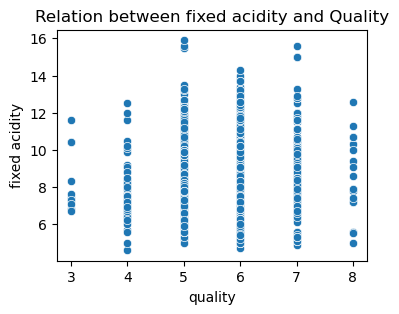

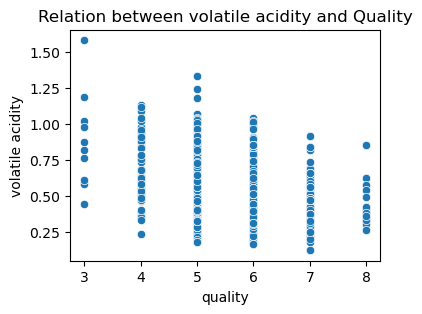

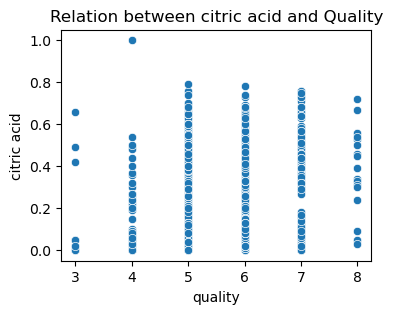

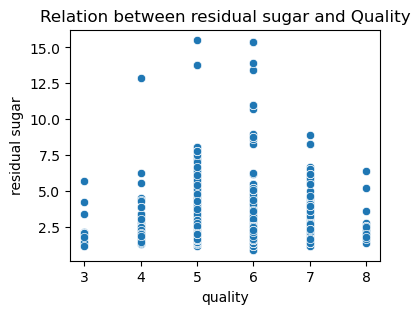

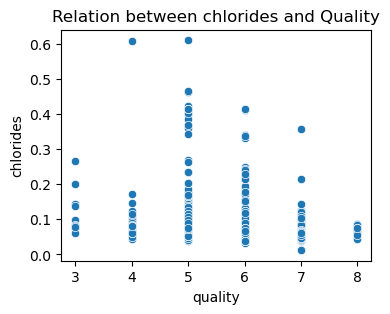

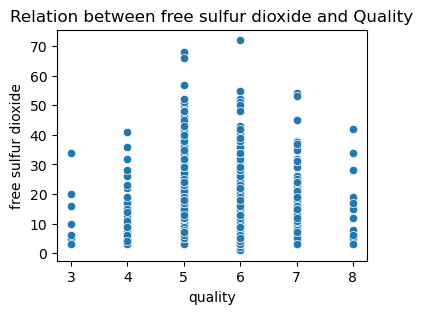

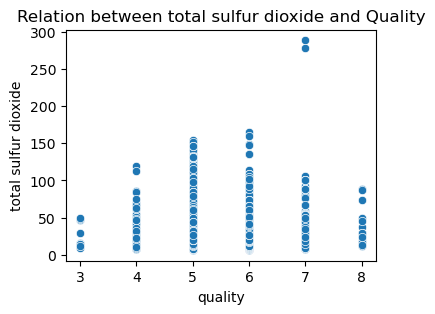

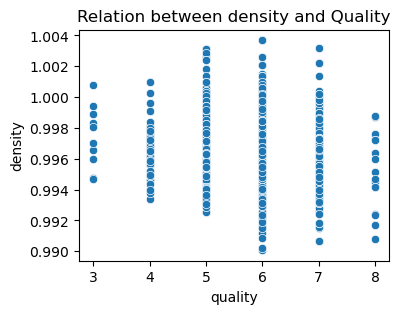

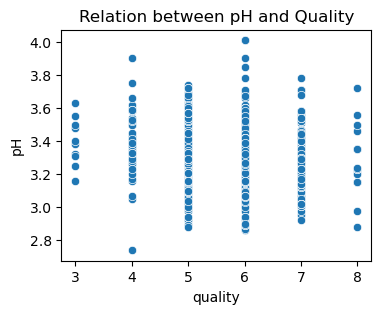

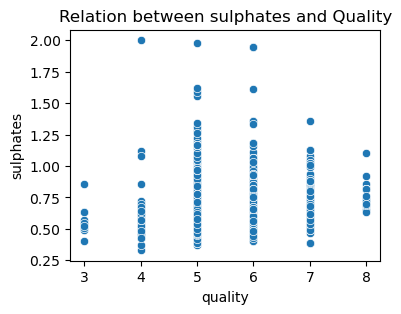

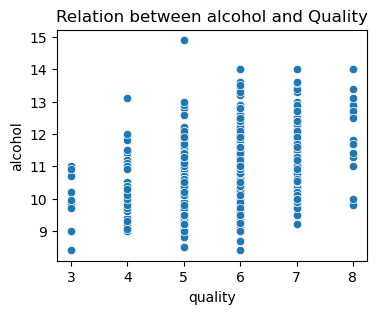

In [12]:
#Visualizing relation of each feature distribution to the Quality

wine_features = redwine_data.columns.drop('quality')

for feature in wine_features:
    plt.figure(figsize=(4,3))
    sns.scatterplot( x=redwine_data['quality'], y=redwine_data[feature])
    plt.title(f'Relation between {feature} and Quality')
    plt.show()

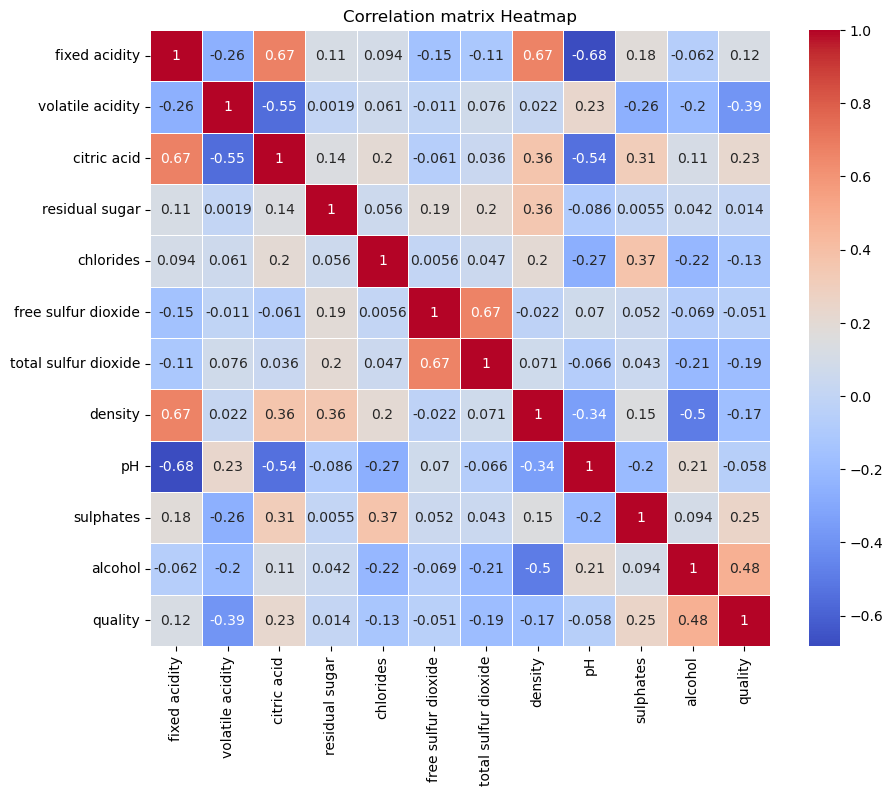

In [21]:
#Visualizing by Heatmap to understand the correlation between all the columns

correlation_wine_para = redwine_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_wine_para, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix Heatmap')
plt.show()

In [22]:
#Data Preprocessing to prepare for the machine learning model

x_para = redwine_data.drop('quality', axis=1) #seperating the quality label from data
x_para

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [23]:
#Classifying the Lable(Quality column) into integer numbers/Binary numbers (here considering Binarization because we are predicting only GOOD/NOT GOOD Quality )

y_para = redwine_data['quality'].apply(lambda y_no:1 if y_no >= 7 else 0)
y_para

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [24]:
#Splitting the preprocessed data into train and test data and target datas

x_para_train, x_para_test, y_para_train, y_para_test = train_test_split(x_para, y_para, test_size = 0.2, random_state=3)

In [25]:
print(y_para.shape, y_para_train.shape, y_para_test)

(1599,) (1279,) 147     0
937     0
877     0
1000    1
73      0
       ..
841     0
889     0
1145    0
1476    0
187     0
Name: quality, Length: 320, dtype: int64


In [26]:
#Loading the data into model for model training

#here using RandomForestClassifier to predict according to the multi-decision tree classification

first_model = RandomForestClassifier()
first_model.fit(x_para_train, y_para_train)

RandomForestClassifier()

In [27]:
#Model evaluation & Accuracy score

x_para_test_prediction = first_model.predict(x_para_test) #model evaluatin for the test data

test_data_accuracy = accuracy_score(x_para_test_prediction, y_para_test) #Accuracy on test data compare to original labled value

print('Accuracy is: ', test_data_accuracy)

Accuracy is:  0.9375


In [28]:
#prediction process with Manual input of the Wine Attributes/parameter

fixed_acidity = input('Fixed Acidity (Tentative Range: 4.600000 to 15.900000): ') 
volatile_acidity = input('Volatile Acidity (Tentative Range: 0.120000 to 1.580000): ')
citric_acid = input('Citric Acid (Tentative Range: 0.000000 to 1.000000): ')
residual_sugar = input('Residual sugar (Tentative Range: 0.900000 to 15.500000): ')
chlorides = input('Chloride (Tentative Range: 0.012000 to 0.611000): ')
free_so2 = input('Free sulfer dioxide (Tentative Range: 1.000000 to 72.000000): ')
total_so2 = input('Total sulfer dioxide (Tentative Range: 6.000000 to 289.000000): ')
density = input('Density: (Tentative Range: 0.990070 to 1.003690): ')
ph = input('pH value: (Tentative Range: 2.740000 to 4.010000): ')
sulphates = input('Sulphates: (Tentative Range: 0.330000 to 2.000000): ')
alcohol = input('Alcohol (Tentative Range: 8.400000 to 14.900000): ')

wine_data = (fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_so2, total_so2, density, ph, sulphates, alcohol)

wine_numpy_array = np.asarray(wine_data) #converting input data to numpy array for easy operations
wine_data_reshaping = wine_numpy_array.reshape(1,-1) #reshaping the data as 2D array from 1D

predicting_manual_inputdata = first_model.predict(wine_data_reshaping)
prediction_confidence_manualdata = first_model.predict_proba(wine_data_reshaping)

print('Quality Group is: ', predicting_manual_inputdata[0])

if predicting_manual_inputdata[0]==1:
    print('This Wine Quality is GOOD')
    print(f'The confidence for Good Quality prediction is {int(prediction_confidence_manualdata[0][1]*100)} %')
else:
    print('This Wine Quality is NOT GOOD')
    print(f'The confidence for NOT Good Quality prediction is {int(prediction_confidence_manualdata[0][0]*100)} %')

Fixed Acidity (Tentative Range: 4.600000 to 15.900000): 10.700000
Volatile Acidity (Tentative Range: 0.120000 to 1.580000): 0.770000
Citric Acid (Tentative Range: 0.000000 to 1.000000): 0.700000
Residual sugar (Tentative Range: 0.900000 to 15.500000): 11.700000
Chloride (Tentative Range: 0.012000 to 0.611000): 0.477000
Free sulfer dioxide (Tentative Range: 1.000000 to 72.000000): 70.000000
Total sulfer dioxide (Tentative Range: 6.000000 to 289.000000): 177.700000
Density: (Tentative Range: 0.990070 to 1.003690): 0.997777
pH value: (Tentative Range: 2.740000 to 4.010000): 3.770000
Sulphates: (Tentative Range: 0.330000 to 2.000000): 1.770000
Alcohol (Tentative Range: 8.400000 to 14.900000): 11.700000
Quality Group is:  0
This Wine Quality is NOT GOOD
The confidence for NOT Good Quality prediction is 56 %


C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
#Prediction process for any one of the given data

wine_data1 = x_para.iloc[int(input('Select Row-index from the data: '))].to_numpy() #selecting user input for raw-index to do a prediction
reshape_wine_data1 = wine_data1.reshape(1,-1) #reshaping the data as 2D array from 1D

prediction_system1 = first_model.predict(reshape_wine_data1)
prediction_confidence = first_model.predict_proba(reshape_wine_data1) #generating prediction probability with reference to a considered model

print('Quality Group is: ', prediction_system1[0])

if prediction_system1[0]==1:
    print('This Wine Quality is GOOD')
    print(f'The confidence for Good Quality prediction is {int(prediction_confidence[0][1]*100)} %')
else:
    print('This Wine Quality is NOT GOOD')
    print(f'The confidence for NOT Good Quality prediction is {int(prediction_confidence[0][0]*100)} %')

Select Row-index from the data: 7
Quality Group is:  1
This Wine Quality is GOOD
The confidence for Good Quality prediction is 69 %


C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\praje\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#CONCLUSION:

#Here I generated the Accuracy of the Testing data as 0.9375 which is near to 1, hence the suitability of the model can be said as well for the given data.

#The prediction system is giving confidence percentage for the predicted classification, which will ensure how much the prediction is reliable to believe or accept.